# Bike Classification

This notebook has been created as a homework of the FastAI Part 1 v5 (2022) course. 
The course notebook is [here](https://www.kaggle.com/code/jhoward/is-it-a-bird-creating-a-model-from-your-own-data)

## What is that bike?
I am going to classify among the following 3 bikes
- Road bike
- Mountain bike
- BMX

In [1]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [3]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

## Visualize and download images of these species

In [4]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastai.vision.all import *
from fastdownload import download_url
from fastai.vision.widgets import *
import random

In [5]:
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [6]:
def download_and_show_image(name, size=(512, 512)):
    filename = ".".join(["_".join(name.split(" ")), "jpg"]) 
    download_url(search_images(name, max_images=10)[random.randint(0, 9)], filename, show_progress=False)
    return Image.open(filename).to_thumb(*size)

### Road Bike

Searching for 'road bike'


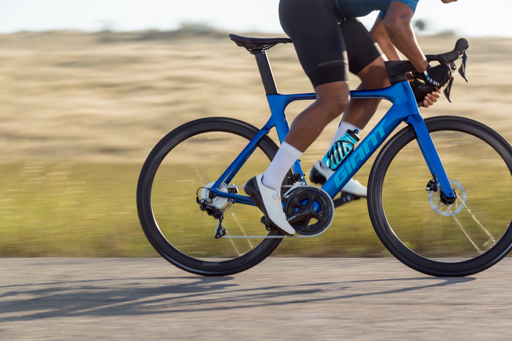

In [7]:
download_and_show_image('road bike')

### Mountain Bike

Searching for 'mountain bike'


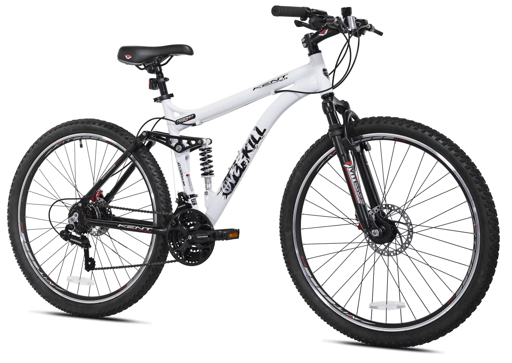

In [8]:
download_and_show_image('mountain bike')

### BMX

Searching for 'BMX'


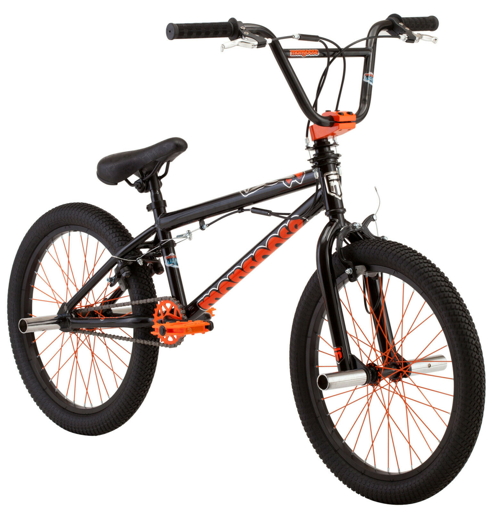

In [9]:
download_and_show_image('BMX')

In [10]:
!rm -rf bike

In [11]:
searches = 'road bike','mountain bike', 'BMX'
path = Path('bike')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o}'))
    resize_images(path/o, max_size=512, dest=path/o)

Searching for 'road bike'
Searching for 'mountain bike'
Searching for 'BMX'


In [12]:
!ls bike

 BMX  'mountain bike'  'road bike'


In [13]:
for s in searches:
    print(s, len(Path(path/s).ls()))

road bike 30
mountain bike 30
BMX 30


## Step 2: Train our model

In [14]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

9

In [15]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(324, method='squish')], 
    batch_tfms=aug_transforms()
).dataloaders(path, bs=16)

Could not do one pass in your dataloader, there is something wrong in it. Please see the stack trace below:


RuntimeError: solve: MAGMA library not found in compilation. Please rebuild with MAGMA.

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy)

In [ ]:
learn.fine_tune(10)

We are getting a low accuracy because lot of the searches are mismatch, we need to relabel the images. For that we will use `ImageClassifierCleaner`

## Step 3: Interpret the model

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(5, nrows=1)

## Step 4: Use our model (and build your own!)

In [ ]:
which_bike,_,probs = learn.predict(PILImage.create('BMX.jpg'))
which_bike